Columns: ['Participent', 'Accuracy(%)', 'ReactionTime']
count    16.000000
mean     93.275000
std       3.551244
min      87.200000
25%      90.050000
50%      93.900000
75%      96.225000
max      98.000000
Name: Accuracy(%), dtype: float64
Class distribution:
 ManualLabel
1    8
0    8
Name: count, dtype: int64


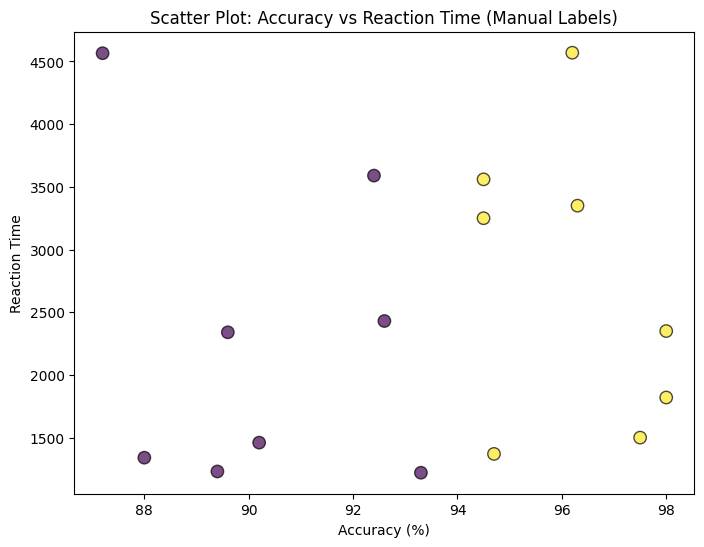

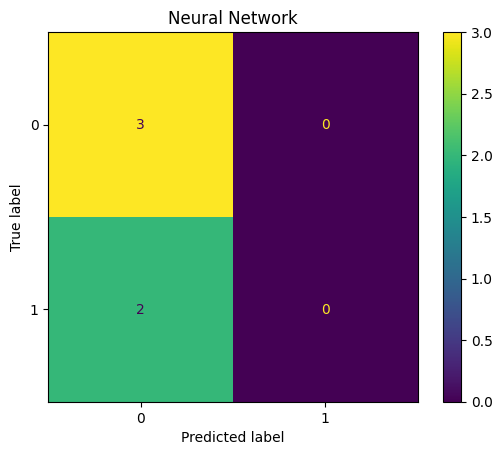

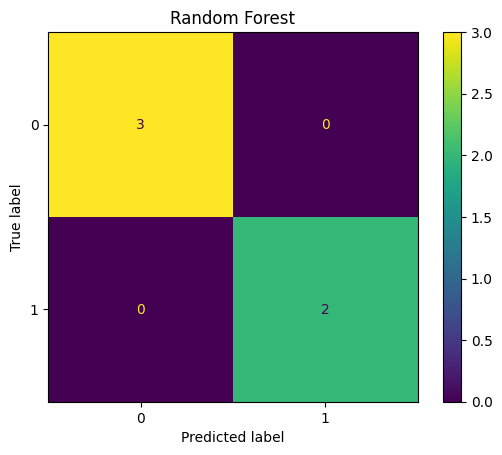

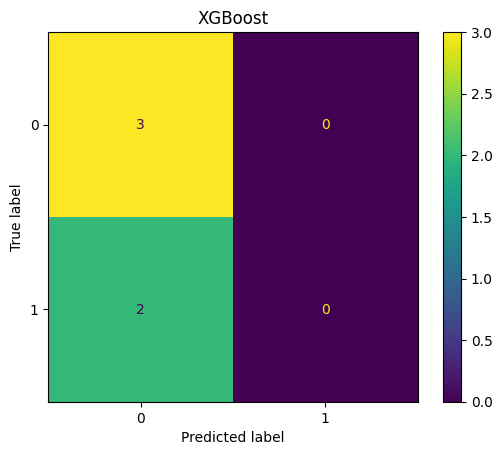

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Data Load
df = pd.read_excel("stroop_test_data.xlsx")

# Column name clean
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

# Accuracy value check
print(df['Accuracy(%)'].describe())

# Threshold Auto-set (median + small margin)
auto_threshold = df['Accuracy(%)'].median()
df['ManualLabel'] = np.where(df['Accuracy(%)'] > auto_threshold, 1, 0)

# If there is still one class left, use the fallback threshold.
if df['ManualLabel'].nunique() < 2:
    fallback_threshold = df['Accuracy(%)'].mean()
    df['ManualLabel'] = np.where(df['Accuracy(%)'] > fallback_threshold, 1, 0)

print("Class distribution:\n", df['ManualLabel'].value_counts())

# Scatter Plot (Manual Labels)
plt.figure(figsize=(8,6))
plt.scatter(df['Accuracy(%)'], df['ReactionTime'], c=df['ManualLabel'], cmap='viridis', s=80, alpha=0.7, edgecolors='k')
plt.xlabel("Accuracy (%)")
plt.ylabel("Reaction Time")
plt.title("Scatter Plot: Accuracy vs Reaction Time (Manual Labels)")
plt.show()

# Statistical Features
df['Accuracy_mean'] = df['Accuracy(%)'].mean()
df['Accuracy_std'] = df['Accuracy(%)'].std()
df['RT_mean'] = df['ReactionTime'].mean()
df['RT_std'] = df['ReactionTime'].std()

features = df[['Accuracy(%)', 'ReactionTime', 'Accuracy_mean', 'Accuracy_std', 'RT_mean', 'RT_std']]
target = df['ManualLabel']

# Train-Test Split (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42, stratify=target
)

# Neural Network
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Confusion Matrix প্লট
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)
    plt.show()

plot_cm(y_test, y_pred_nn, "Neural Network")
plot_cm(y_test, y_pred_rf, "Random Forest")
plot_cm(y_test, y_pred_xgb, "XGBoost")